<a href="https://colab.research.google.com/github/Nazmul92/Deep-Learning-using-Tensorflow-and-Keras/blob/main/AlexNet_for_skin_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout
from keras.layers import Activation, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import numpy as np
from sklearn.metrics import confusion_matrix

In [ ]:
train=ImageDataGenerator(rescale=1./255)
validation=ImageDataGenerator(rescale=1./255)
test=ImageDataGenerator(rescale=1./255)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dermnet_Dataset.zip to dermnet_Dataset.zip


In [ ]:
!unzip dermnet_Dataset.zip

Archive:  dermnet_Dataset.zip
   creating: dermnet_Dataset/test_dataset/
   creating: dermnet_Dataset/test_dataset/acne/
  inflating: dermnet_Dataset/test_dataset/acne/141__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpg  
  inflating: dermnet_Dataset/test_dataset/acne/142__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpg  
  inflating: dermnet_Dataset/test_dataset/acne/149__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpg  
  inflating: dermnet_Dataset/test_dataset/acne/160__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpg  
  inflating: dermnet_Dataset/test_dataset/acne/165__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpg  
  inflating: dermnet_Dataset/test_dataset/acne/169__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsInkiLDg1XQ.jpg  
  inflating: dermnet_Dataset/test_dataset/acne/171__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpg  
  inflating: dermnet_Dataset/test_dataset/acne/173__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsInki

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
train_dataset=train_datagen.flow_from_directory( 'dermnet_Dataset/train_dataset', 
        target_size=(224, 224), 
        batch_size=20,
        class_mode='categorical')  
train_dataset.class_indices
validation=ImageDataGenerator(rescale=1./255)
test=ImageDataGenerator(rescale=1./255)
test_dataset=test.flow_from_directory('dermnet_Dataset/test_dataset', 
        target_size=(224, 224), 
        batch_size=20,
        class_mode='categorical')  
validation_dataset=validation.flow_from_directory(
       'dermnet_Dataset/validation_dataset',
        target_size=(224, 224),
        batch_size=20)

X_train,y_train=train_dataset.next()
X_test,y_test=validation_dataset.next()

Found 568 images belonging to 4 classes.
Found 174 images belonging to 4 classes.
Found 157 images belonging to 4 classes.


In [ ]:
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(4))
model.add(Activation('softmax'))
import keras
from keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=.001),
              metrics=['accuracy'])

In [ ]:
validation=ImageDataGenerator(rescale=1./255)
test=ImageDataGenerator(rescale=1./255)
test_dataset=test.flow_from_directory('dermnet_Dataset/test_dataset', 
        target_size=(224, 224), 
        batch_size=20,
        class_mode='categorical')  
validation_dataset=validation.flow_from_directory(
       'dermnet_Dataset/validation_dataset',
        target_size=(224, 224),
        batch_size=20)

X_train,y_train=train_dataset.next()
X_test,y_test=validation_dataset.next()

Found 174 images belonging to 4 classes.
Found 157 images belonging to 4 classes.


In [ ]:
model_fit=model.fit(train_dataset,
                   steps_per_epoch=10,
                   epochs=500,
                   validation_data=validation_dataset)

Epoch 1/500
10/10 [==============================] - 38s 401ms/step - loss: 2.5741 - accuracy: 0.2152 - val_loss: 296.9636 - val_accuracy: 0.2484
Epoch 2/500
10/10 [==============================] - 3s 296ms/step - loss: 2.8033 - accuracy: 0.2709 - val_loss: 273.8678 - val_accuracy: 0.2484
Epoch 3/500
10/10 [==============================] - 3s 306ms/step - loss: 2.1639 - accuracy: 0.3788 - val_loss: 90.7318 - val_accuracy: 0.2484
Epoch 4/500
10/10 [==============================] - 3s 301ms/step - loss: 1.9172 - accuracy: 0.3400 - val_loss: 92.2584 - val_accuracy: 0.2484
Epoch 5/500
10/10 [==============================] - 3s 313ms/step - loss: 2.0501 - accuracy: 0.3084 - val_loss: 77.0899 - val_accuracy: 0.2484
Epoch 6/500
10/10 [==============================] - 3s 299ms/step - loss: 1.8066 - accuracy: 0.3133 - val_loss: 69.3364 - val_accuracy: 0.2484
Epoch 7/500
10/10 [==============================] - 3s 314ms/step - loss: 1.6694 - accuracy: 0.3611 - val_loss: 28.7680 - val_accura

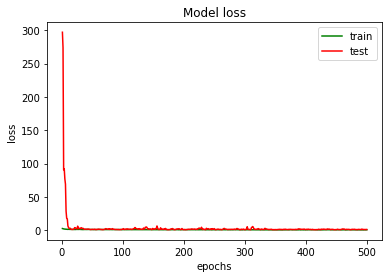

In [ ]:
import matplotlib.pyplot as plt
loss=model_fit.history['loss']
val_loss=model_fit.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'g')
plt.plot(epochs,val_loss,'r')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'], loc='upper right')
plt.show()

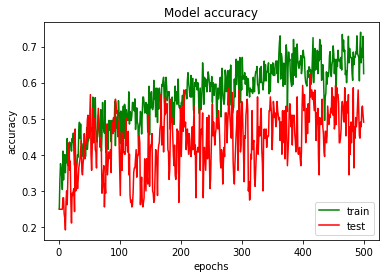

In [ ]:
acc=model_fit.history['accuracy']
val_acc=model_fit.history['val_accuracy']
plt.plot(epochs,acc,'g')
plt.plot(epochs,val_acc,'r')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'], loc='lower right')
plt.show()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
cm=confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

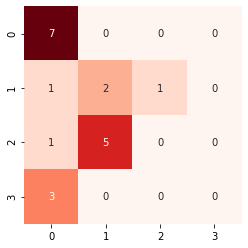

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, square=True, annot=True, cbar=False, cmap=plt.cm.Reds)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.58      1.00      0.74         7
           1       0.29      0.50      0.36         4
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         3

    accuracy                           0.45        20
   macro avg       0.22      0.38      0.28        20
weighted avg       0.26      0.45      0.33        20



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
